In [1]:
#Loading needed libraries
import json
import networkx as nx
from itertools import combinations
from collections import *
import matplotlib.pyplot as plt
import heapq
import seaborn as sns
import pandas as pd

# PART ONE

Loading the computer science bibliography json data into local by creating a function import_data

In [3]:
def import_data(red, full):
    data = json.load(open(full))
    data_reduced =  json.load(open(red))
    return [data, data_reduced]

For this part, json files are stored in local under variables: 

data -> for the full JSON file

data_reduced -> for the reduced one

In [4]:
#Loading dblp's into local

data, data_reduced = import_data('reduced_dblp.json', 'full_dblp.json')

Definition of a function for creating a graph (using networkx library)
by traversing the json file for each publication, if an author is not the present, a node is added.
On the other hand, if an author is already a graph vertex, the associated publications and conferences are update.
Once done, edges are included weighing them by using the Jaccard distance of their respective publication sets.

In [5]:
#Defining function to create graph

def create_graph(data_to_load):
    G=nx.Graph()
    
    #adding nodes
    #for each note we give attributes the name of the, his publications,
    #with id's and titles, and the conferences he's been to
    
    authors_for_publ = []
    for publ in data_to_load:
        authors = []
        for aut in publ["authors"]:
            authors.append(aut["author_id"])
            try: 
                G.node[aut["author_id"]]
            except:
                G.add_node(aut["author_id"], name = aut["author"], publ_id = set(), title =  set(), conf_id = [])
            G.node[aut["author_id"]]["publ_id"].add(publ['id_publication_int'])
            G.node[aut["author_id"]]["title"].add(publ['title'])
            G.node[aut["author_id"]]["conf_id"].append(publ['id_conference_int'])
        authors_for_publ.append(authors)
                
    #adding edges
    for auth in authors_for_publ:
        Allcombinations = combinations(auth,2)
        for comb in Allcombinations:
            Jaccard = 1 - (len(G.node[comb[0]]["publ_id"].intersection(G.node[comb[1]]["publ_id"])) / len(G.node[comb[0]]["publ_id"].union(G.node[comb[1]]["publ_id"])))    
            G.add_edge(comb[0], comb[1], weight = Jaccard)
    return G

Calling the function up created either to load in G the reduced graph, or the full one.

In [6]:
#reduced
#G = create_graph(data_reduced)
G = create_graph(data)

# PART TWO

Once the data is properly loaded in a graph structure, we want to perform statistical analyis based on visual methods.

###  part2 (a)

Given a conference in input, the subgraph induced by the set of authors who
 published at the input conference at least once, is returned.

Centrality measures are computed and  plotted.

step 1 : Taking conference in input

In [7]:
print("Enter conference id: ")
conference_id = int(input())

Enter conference id: 
3052


In [8]:
#A list of authors of interest is obtained and hence a subgraph having them as nodes, is generated.
authors_of_interest = [aut for aut, attr in G.nodes(data = True) if conference_id in attr["conf_id"]]
subgraph_1 = G.subgraph(authors_of_interest)

step 2 : Plotting the obtained supgraph

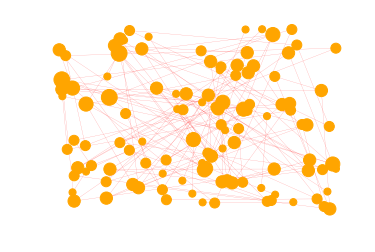

In [9]:
#Assigning random positions for the graph nodes. The size of the nodes reflect their degrees.
pos = nx.random_layout(subgraph_1)
degrees = nx.degree(subgraph_1)
#Plotting the graph
nx.draw_networkx_nodes(subgraph_1, pos, node_shape = "o", node_size =[v*50 for v in degrees.values()] , node_color = "orange")
nx.draw_networkx_edges(subgraph_1, pos, width = 0.2 , edge_color = "red", alpha = 0.5)
plt.axis('off')
plt.show()

step 3: Computing some centrality measures and plotting them

The following procedure computes four centrality measures.

In [10]:
def compute_centrality_measures(subgr):
    #Degree centrality
    dict_dc = nx.degree_centrality(subgr)
    #Closeness centrality
    dict_close = nx.closeness_centrality(subgr)
    #Betweeness centrality
    dict_bet = nx.betweenness_centrality(subgr)
    #Eigenvector centrality
    dict_eig = nx.eigenvector_centrality(subgr, max_iter = 1000)

    return [dict_dc, dict_close, dict_bet, dict_eig]

Assign the output of the function above to variables

In [11]:
dict_dc, dict_close, dict_bet, dict_eig = compute_centrality_measures(subgraph_1)

### Plots

Degree bar chart

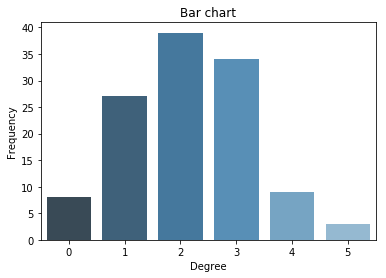

In [12]:
counts = Counter(nx.degree(subgraph_1).values())
sns.barplot(x = list(counts.keys()), y = list(counts.values()),  palette = 'Blues_d')
plt.title('Bar chart')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

In [ ]:
for publ in data_reduced:
    

Strip plots and bar charts

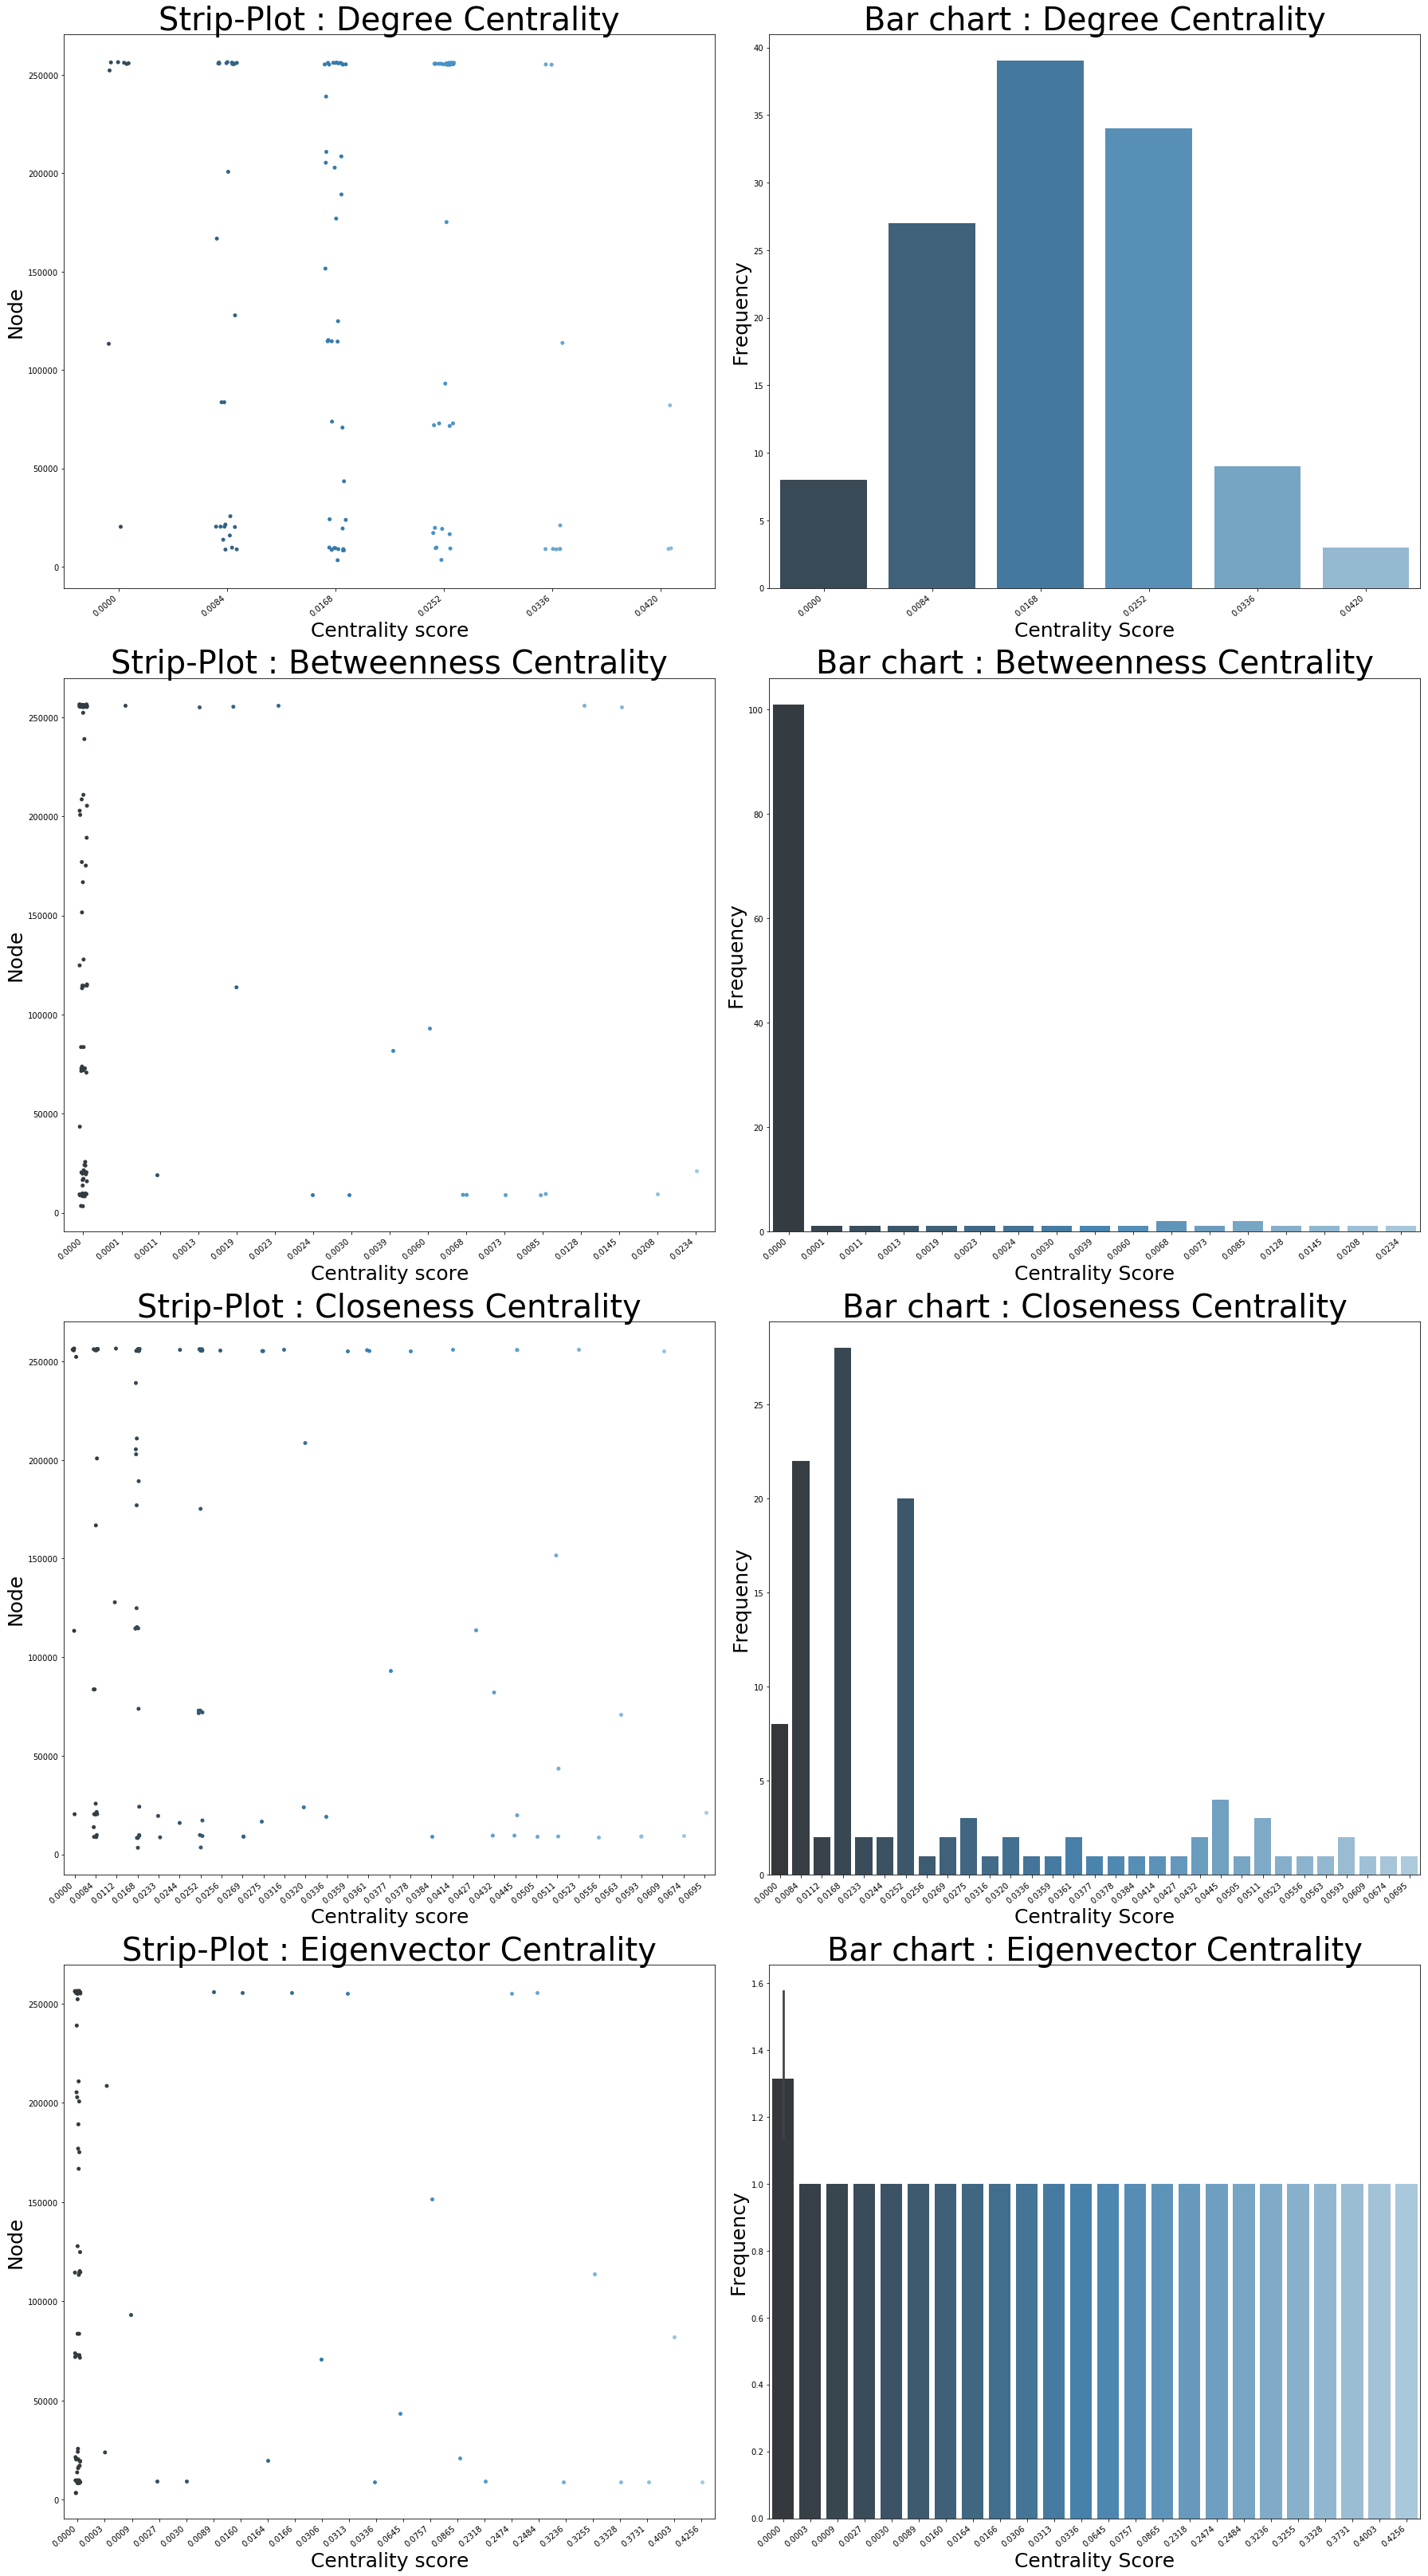

In [30]:
plt.figure(figsize = (25,45))

#strip-plot
plt.subplot(421)
plt.title("Strip-Plot : Degree Centrality", fontsize = 40)
categories1 =  ["%.4f" % elem for elem in dict_dc.values()]
ax = sns.stripplot(x = categories1, y = list(dict_dc.keys()), palette = "Blues_d", jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.xlabel('Centrality score', fontsize = 25)
plt.ylabel('Node', fontsize = 25)
#bar chart
plt.subplot(422)
plt.title("Bar chart : Degree Centrality", fontsize = 40)
counts = Counter(dict_dc.values())
categories1b = ["%.4f" % elem for elem in counts.keys()]
ax = sns.barplot(x = categories1b, y = list(counts.values()),  palette = 'Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('Frequency', fontsize = 25)
plt.xlabel('Centrality Score', fontsize = 25)

#Betweeness centrality

#strip-plot
plt.subplot(423)
plt.title("Strip-Plot : Betweenness Centrality", fontsize = 40)
categories2 =  ["%.4f" % elem for elem in dict_bet.values()]
ax = sns.stripplot(x = categories2, y = list(dict_bet.keys()), palette = "Blues_d", jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.xlabel('Centrality score', fontsize = 25)
plt.ylabel('Node', fontsize = 25)

#bar chart
plt.subplot(424)
plt.title("Bar chart : Betweenness Centrality", fontsize = 40)
counts = Counter(dict_bet.values())
categories2b = ["%.4f" % elem for elem in counts.keys()]
ax = sns.barplot(x = categories2b, y = list(counts.values()),  palette = 'Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('Frequency', fontsize = 25)
plt.xlabel('Centrality Score', fontsize = 25)

#Closeness centrality

#strip-plot
plt.subplot(425)
plt.title("Strip-Plot : Closeness Centrality", fontsize = 40)
categories3 =  ["%.4f" % elem for elem in dict_close.values()]
ax = sns.stripplot(x = categories3, y = list(dict_close.keys()), palette = "Blues_d", jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.xlabel('Centrality score', fontsize = 25)
plt.ylabel('Node', fontsize = 25)

#bar chart
plt.subplot(426)
plt.title("Bar chart : Closeness Centrality", fontsize = 40)
counts = Counter(dict_close.values())
categories3b = ["%.4f" % elem for elem in counts.keys()]
ax = sns.barplot(x = categories3b, y = list(counts.values()),  palette = 'Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('Frequency', fontsize = 25)
plt.xlabel('Centrality Score', fontsize = 25)

#Eigenvector centrality

#strip-plot
plt.subplot(427)
plt.title("Strip-Plot : Eigenvector Centrality", fontsize = 40)
categories4 =  ["%.4f" % elem for elem in dict_eig.values()]
ax = sns.stripplot(x = categories4, y = list(dict_eig.keys()), palette = "Blues_d", jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.xlabel('Centrality score', fontsize = 25)
plt.ylabel('Node', fontsize = 25)

#bar chart
plt.subplot(428)
plt.title("Bar chart : Eigenvector Centrality", fontsize = 40)
counts = Counter(dict_eig.values())
categories4b = ["%.4f" % elem for elem in counts.keys()]
ax = sns.barplot(x = categories4b, y = list(counts.values()),  palette = 'Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.ylabel('Frequency', fontsize = 25)
plt.xlabel('Centrality Score', fontsize = 25)
plt.show()

Scatterplot matrix, showing the histrograms of the different measures in the main diagonal

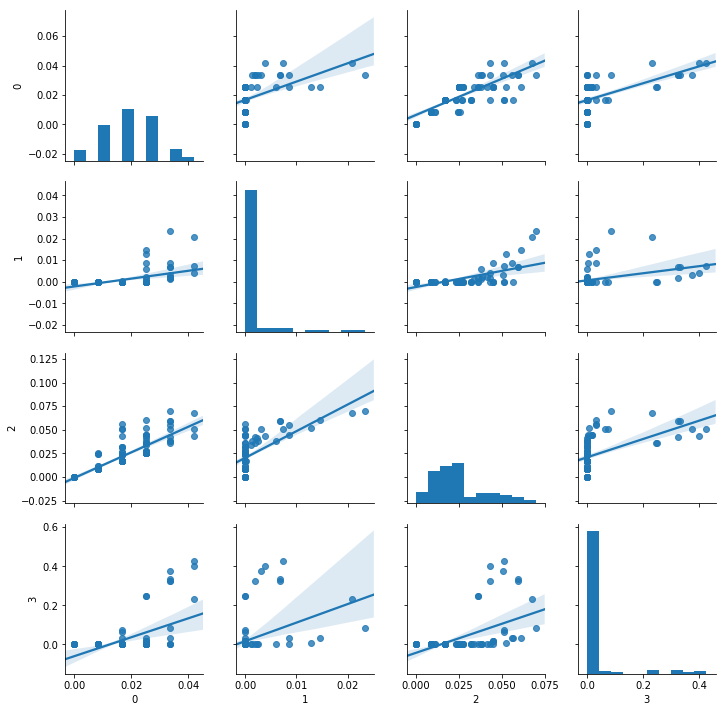

In [16]:
df = pd.DataFrame.from_dict([dict_dc, dict_bet, dict_close, dict_eig]).transpose()
sns.pairplot(df, kind = 'reg', palette = 'Blues_d')
plt.show()

Violin plots

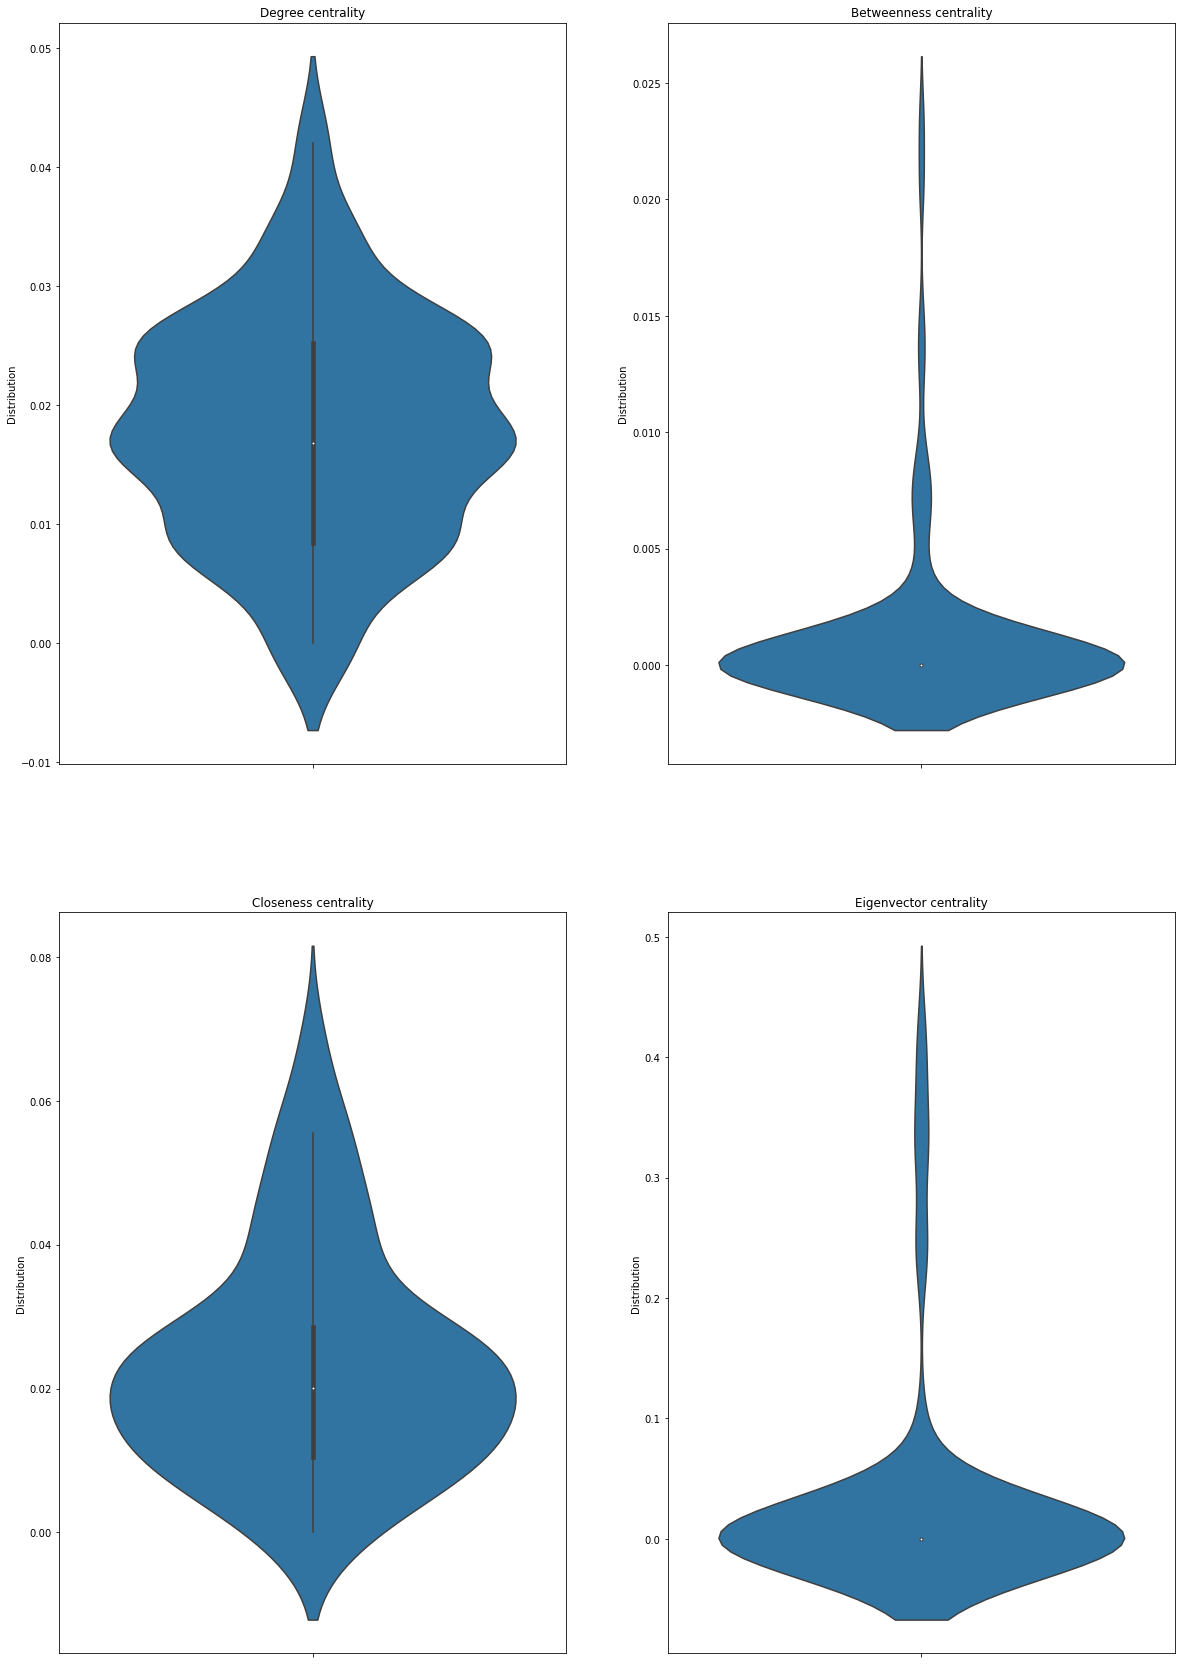

In [31]:
#Degree centrality
plt.figure(figsize = (20,30))
plt.subplot(221)
plt.title("Degree centrality")
plt.ylabel("Distribution")
sns.violinplot(y = list(dict_dc.values()))


#Betwness centrality
plt.subplot(222)
plt.title("Betweenness centrality")
plt.ylabel("Distribution")
sns.violinplot(y = list(dict_bet.values()))

#Closeness centrality
plt.subplot(223)
plt.title("Closeness centrality")
plt.ylabel("Distribution")
sns.violinplot(y = list(dict_close.values()))

#Eigenvector centrality
plt.subplot(224)
plt.title("Eigenvector centrality")
plt.ylabel("Distribution")
sns.violinplot(y = list(dict_eig.values()))

plt.show()

### part2 (b)

Given in input an author and an integer d, the subgraph induced by the nodes that have hop distance at most equal to d with the input author, is retrieved and then visualized.

step 1 : Defining a function that given the author_id in input returns the list of the authors needed.


In [ ]:
'''output_set given as argument (initialized empty) is recursively updated for each hop distance up to d.
In the beginning the input is the single author_id as a list, since at the i-th level of recursion
the function must iterate through all the neighbour nodes of the i-hop_distance
nodes (up to d hops) '''

def hop_d(children, dist, output_set):
    #using set to avoid repetitions, since the order does not matter 
    children_next = set()
    for child in children: 
        children_next.update(set(G.neighbors(child)))
    #update output_set with new children
    output_set.update(children_next)
    #decrease hop distance
    dist-=1
    #base case d = 0 
    if dist>0:
        hop_d(children_next, dist, output_set)
    return output_set 


step 2 : Getting input from user

In [ ]:
print('Enter author_id:')
author_id = int(input())
author_id = [author_id] #converting into list to adapt it to hop_d function
print('Enter (hop distance) d :')
d = int(input())

step 3 : calling the up defined function (hop_d) and plotting the desired subgraph

In [ ]:
#Giving empty set in input to start function's job normally
authors_of_interest_2 = hop_d(author_id, d, set())
#Having the authors of interest, store them in a subgraph
subgraph_2 = G.subgraph(authors_of_interest_2)
#Plot the subgraph


In [ ]:
#select random node positions
pos = nx.random_layout(subgraph_2)

In [ ]:
#draw the graph with node size proportional to the degree
degrees = nx.degree(subgraph_2)
nx.draw_networkx_nodes(subgraph_2, pos, node_shape = "o", node_size =[v*10 for v in degrees.values()] , node_color = "purple")
nx.draw_networkx_edges(subgraph_2, pos, width = 0.2 , edge_color = "blue", alpha = 0.5)
plt.axis('off')
plt.show()

# Part Three

### part3 (a)

Implementation of Dijkstra algorithm. The function takes in input an author (id) and returns the total weight of the shortest path connecting the input author and the source (Aris). As a measure of distance Jaccard weight w(a1,a2) as defined previously is adopted. If the node given as target is not found in the graph, or, similarly, is not connected to the source, a message is printed.

In [ ]:
def shortestPath(G, source, target): 
    
    #Check whether input author exists in graph
    if G.has_node(target) == False:
        return ("Node " + str(target) + " is NOT in the graph.")
    
    #Check whether there is a path from input author to Aris 
    if not nx.has_path(G,source,target): 
        return "There is no path from " + str(source) + " to " + str(target)
    
    #Initialize queue
    Q = []
    heapq.heappush(Q, (0, source))
    
    #Keep track of visited nodes
    D = {aut : None for aut in G.nodes()} 
    
    while Q:
                                   #repeat while Q is not empty 
        t = heapq.heappop(Q)       #pop the current node ,t, associated with minumum distance

        if t[1] == target:
            return "The weight of the shortest path from " + str(source) + " to " + str(target) + " is: " + str(t[0])
        
        #If  t has already been visited, it does not make sense to update all the distances again.
        if D[t[1]] is None:
            #update D to indicate that node t has been visited
            D[t[1]] = t[0]

            # Compute tentative distance for all the unvisited neighbours of current minumum distance node
            # push it into the heap
            for neig in G[t[1]].keys():
                if D[neig] is None:
                    heapq.heappush(Q, (G[t[1]][neig]["weight"] + t[0], neig)) 
        

First, the target is taken as input from user

In [ ]:
print('Enter id of target node:')
target = int(input())

In [ ]:
aris = 256176
# The weight of the shortest path is printed (if source and target are connected).
s = shortestPath(G, aris, target)
print(s)

### part3 (b)

First, a subset of nodes is taken in input

In [ ]:
print("Enter the subset of nodes: (each node separated by a space from the subsequent one)")
query = list(map(int, input().split()))

The following function implements again Dijikstra algorithm to compute the total weight of the shortest paths from each node in q to all the nodes in the graph.
Specifically, a dictionary having as keys the nodes of the graph and as values the minimum between the weights of the shortest paths to the elements of q.
In other words, the format of the output is as follows: { node : minimum weight of shortest path from node to one of the query items}

In [ ]:
def shortestPath_all(G, q): #target
    
    allpaths = defaultdict(list)

    #iterate through all the nodes in the set q
    for source in q: 

        #initialize queue
        Q = []
        heapq.heappush(Q, (0, source))

        #keep track of visited node
        D = {aut : None for aut in G.nodes()} 

        while Q:                        #repeat while Q is not empty 
            t = heapq.heappop(Q)
           
            
            allpaths[t[1]].append(t[0]) #append shortest path weight between source and t
            
            #if t has already been visited, it does not make sense to update all the distances again
            if D[t[1]] is None:
                #updated visited nodes
                D[t[1]] = t[0]
                #update distances related to the unvisited neighbours of t and push them in the heap Q.
                for neig in G[t[1]].keys():
                    if D[neig] is None:
                        heapq.heappush(Q, (G[t[1]][neig]["weight"] + t[0], neig)) #there could be more distances for the same node, but the smallest always come first
                        
                
    #store all the node ids
    nodes = list(allpaths.keys())
    #extract the minumum of all the lists representing the values of the dictionary allpaths.
    minimums = list(map(min, allpaths.values()))
    #create and return the dictionary described above
    return dict(zip(nodes, minimums))           
            

The result is stored in a variable called results

In [ ]:
results = shortestPath_all(G, query)

Then the results are printed.

In [ ]:
for result in results:
    print("Shortest path from node " + str(result) + " to one of the query elements is: " + str(results[result]))